In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense ,Input, Flatten, Conv2D , Softmax, MaxPooling2D,Add,Dropout

In [25]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [7]:
class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']

In [27]:
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test,num_classes=10)

In [8]:
x_train.shape

(60000, 28, 28)

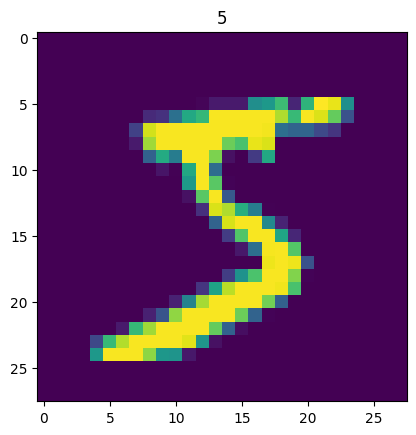

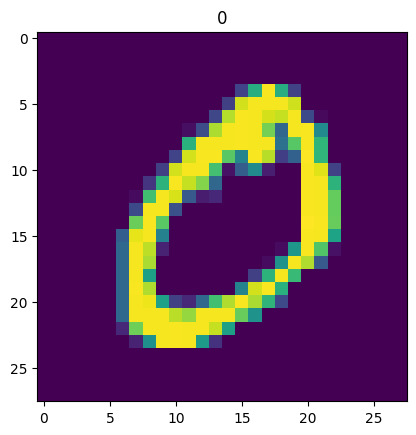

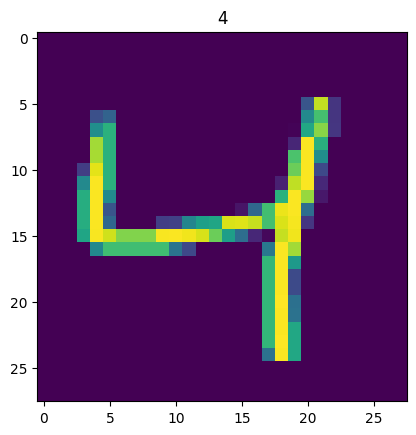

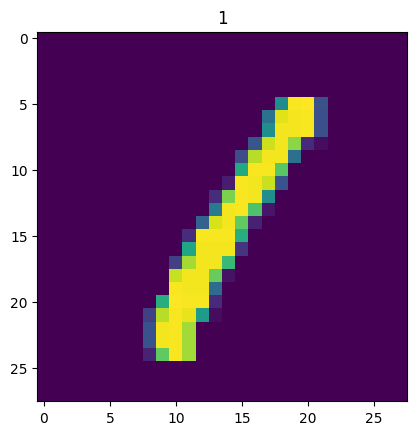

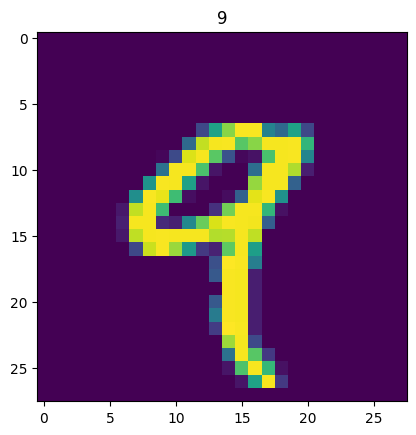

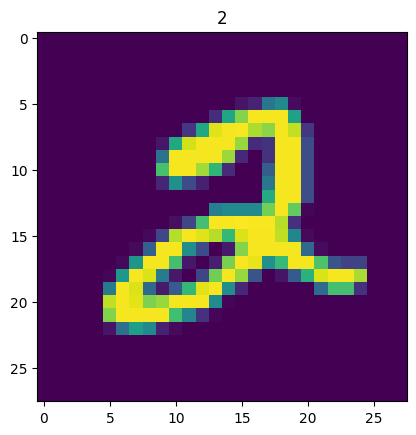

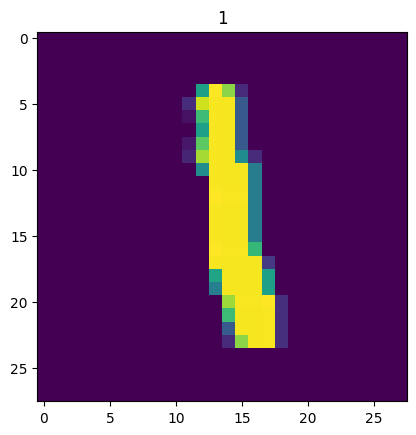

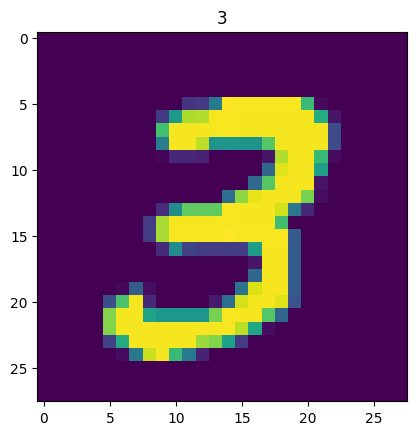

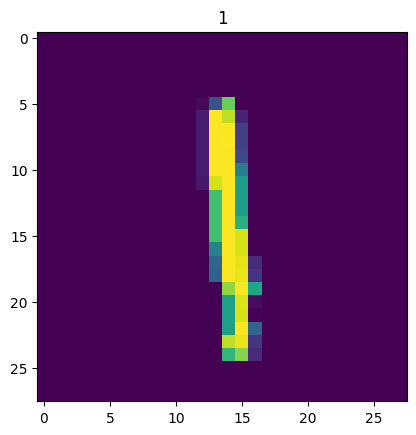

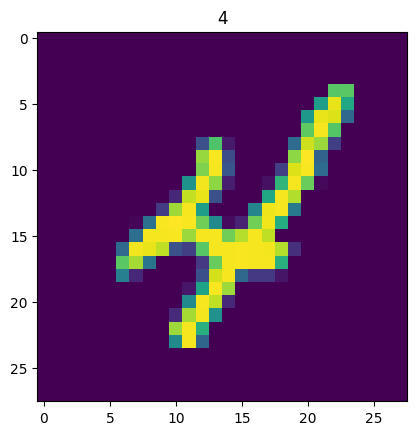

In [9]:
for i in range(10):
    plt.imshow(x_train[i])
    plt.title(y_train[i])
    plt.show()

In [10]:
x_train = x_train/ 255.0

x_test = x_test / 255.0

In [19]:
cnn_model = Sequential([
    Conv2D(filters = 16, kernel_size =(5,5), activation = 'relu', input_shape =(28, 28,1)),
    MaxPooling2D(pool_size = (2,2)),
    Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'),
    MaxPooling2D(pool_size = (2,2)),
    
    Flatten(),
    Dense(128,activation = 'relu'),
    Dropout(0.5),
    Dense(10,activation = 'softmax')
    
])

cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [20]:
cnn_model.compile(optimizer = 'adam' , loss = "categorical_crossentropy", metrics=["accuracy"])
cnn_model.fit(x_train,y_train,epochs = 20 ,batch_size = 80)

Epoch 1/20
750/750 [==============================] - 10s 3ms/step - loss: 0.2990 - accuracy: 0.9077
Epoch 2/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0988 - accuracy: 0.9704
Epoch 3/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0744 - accuracy: 0.9780
Epoch 4/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0600 - accuracy: 0.9830
Epoch 5/20
750/750 [==============================] - 3s 3ms/step - loss: 0.0515 - accuracy: 0.9846
Epoch 6/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0453 - accuracy: 0.9863
Epoch 7/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0409 - accuracy: 0.9875
Epoch 8/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0355 - accuracy: 0.9891
Epoch 9/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0322 - accuracy: 0.9899
Epoch 10/20
750/750 [==============================] - 3s 4ms/step - loss: 0.0285 - accuracy: 0.991

In [28]:
train_loss,train_acc = cnn_model.evaluate(x_train,y_train,verbose = 2)
test_loss,test_acc = cnn_model.evaluate(x_test,y_test,verbose = 2)

1875/1875 - 4s - loss: 0.7830 - accuracy: 0.9977 - 4s/epoch - 2ms/step
313/313 - 1s - loss: 5.5749 - accuracy: 0.9919 - 840ms/epoch - 3ms/step


In [30]:
x_test[0].shape

(28, 28)

In [31]:
prediction = cnn_model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


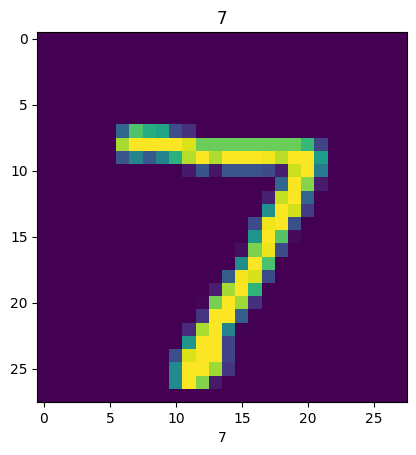

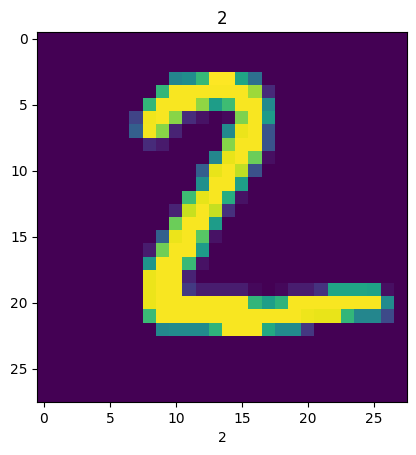

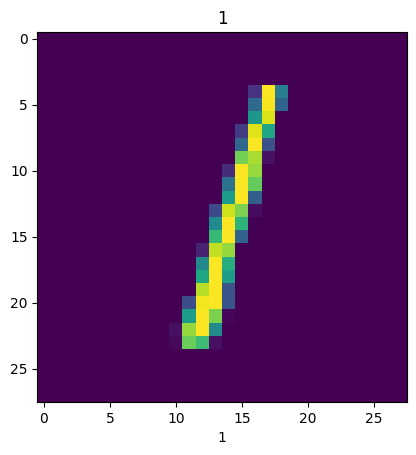

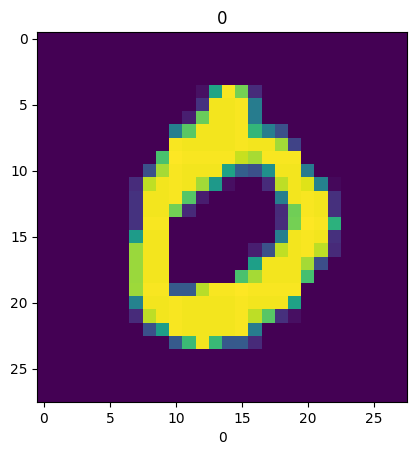

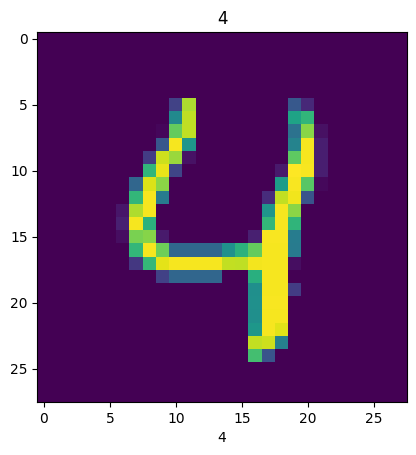

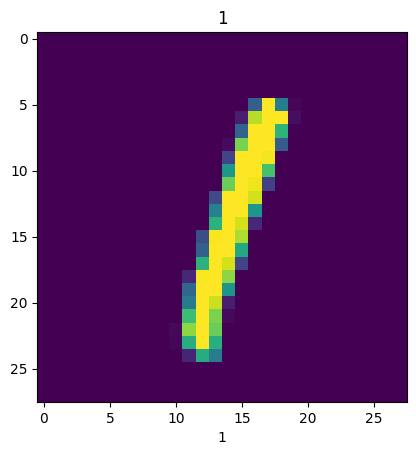

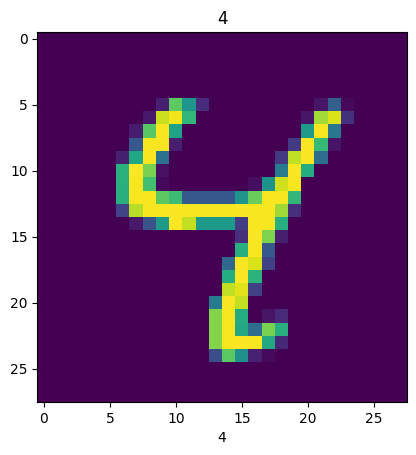

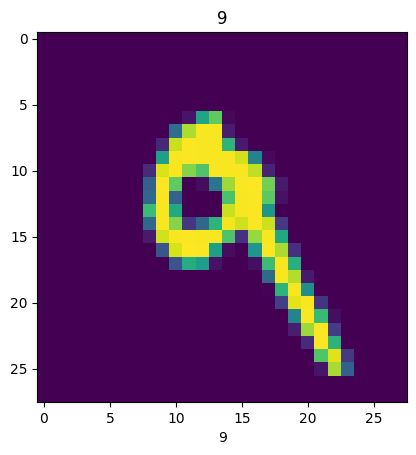

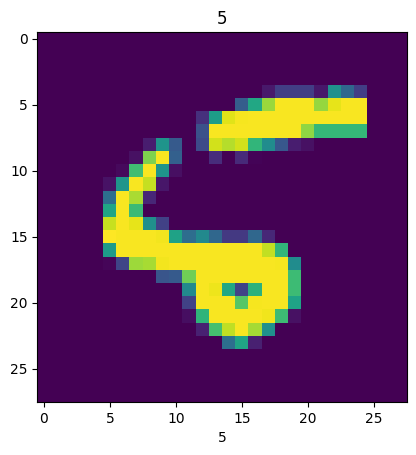

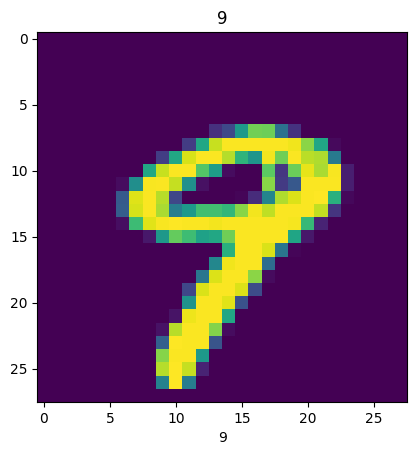

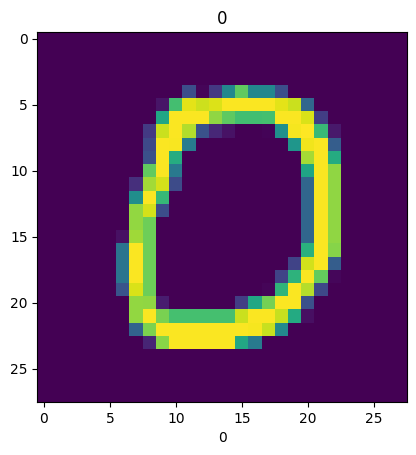

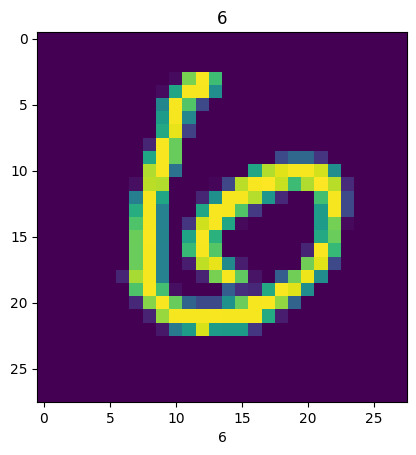

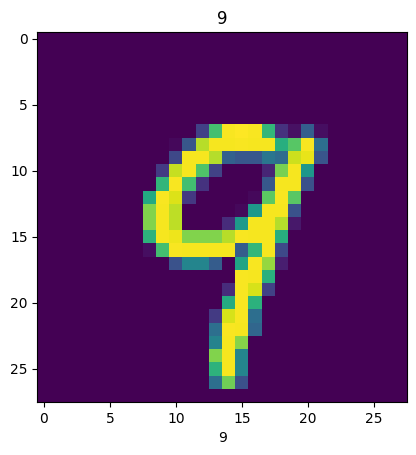

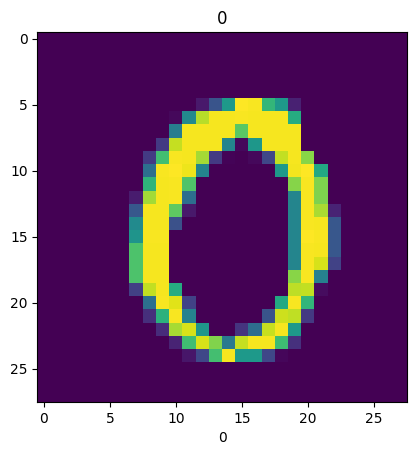

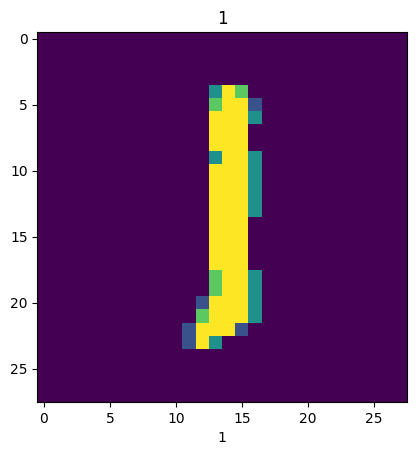

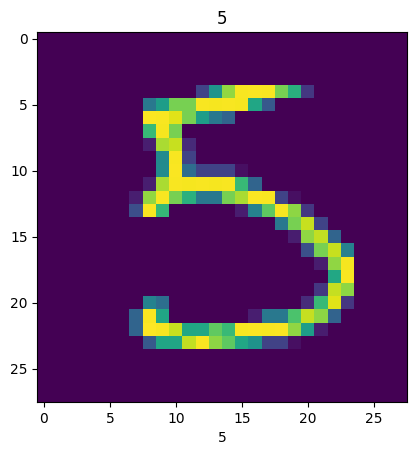

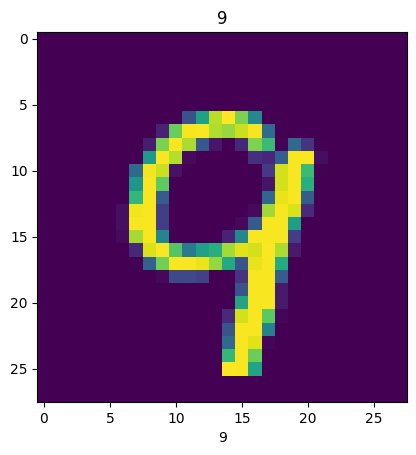

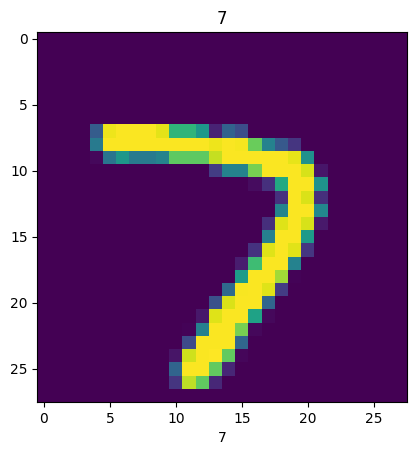

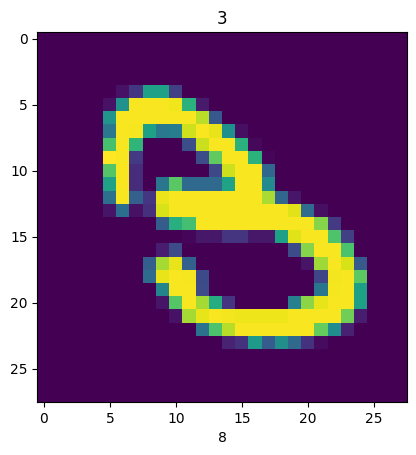

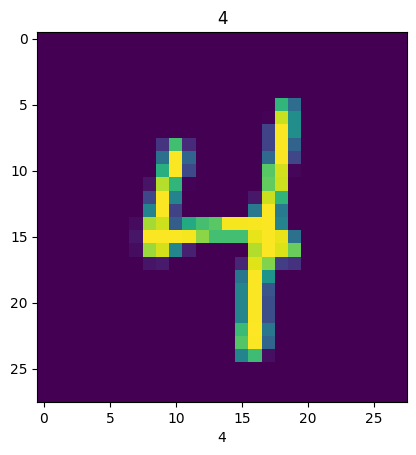

In [35]:
for i in range(20):
    pred = np.argmax(prediction[i])
    
    true_label = np.argmax(y_test[i])
    
    plt.imshow(x_test[i])
    plt.title(true_label)
    plt.xlabel(pred)
    plt.show()
    